# Grammys Project
![](https://www.moviedebuts.com/wp-content/uploads/2021/05/ra_ga_logo.png)

Are you excited to dive into data work for an exciting project at The Recording Academy? You know, the non-profit organization behind the Grammy Awards!

In this project, you'll work on real data from both websites owned by The Recording Academy, the non-profit organization behind the famous Grammy Awards. As you just learned, Ray Starck, the VP of Digital Strategy, decided to split the websites into grammy.com and recordingacademy.com to better serve the Recording Academy's various audience needs.

Now, you are tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior on both sites.  

Are you ready?!?!

Let's do this!

![](https://media.giphy.com/media/ZSK6UPKTSLZCKd7orz/giphy.gif)

## Data Dictionary
To start, you will be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part I - Exploratory Data Analysis

![](https://media.giphy.com/media/6y6fyAD9OIE6NvhJEu/giphy.gif)

## Task 1

Import the `pandas`,`numpy`, and `plotly.express` libraries.

In [110]:
# Import libraries
import pandas as pd
import plotly.express as px

In [111]:
# RUN THIS CELL - DO NOT MODIFY
# this formats numbers to two decimal places when shown in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** For the `grammy_live_web_analytics.csv` file store that into a dataframe called `full_df`

**B.** For the `ra_live_web_analytics.csv` file store that into a dataframe called `rec_academy`

**C.** Preview the dataframes to familiarize yourself with the data.

All files needed can be found in the `datasets` folder.

In [112]:
# Read in dataframes
full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')


In [113]:
rec_academy = pd.read_csv('datasets/ra_live_web_analytics.csv')


In [114]:
# preview full_df dataframe
full_df.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0


In [115]:
# preview rec_academy dataframe
rec_academy.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0


## Task 3

We all know The Grammy Awards is *the* biggest music event in the music industry, but how many visitors does that bring to the website?

**A.** Create a line chart of the number of users on the site for every day in the `full_df`. See if you can spot the days the Grammys awards are hosted.

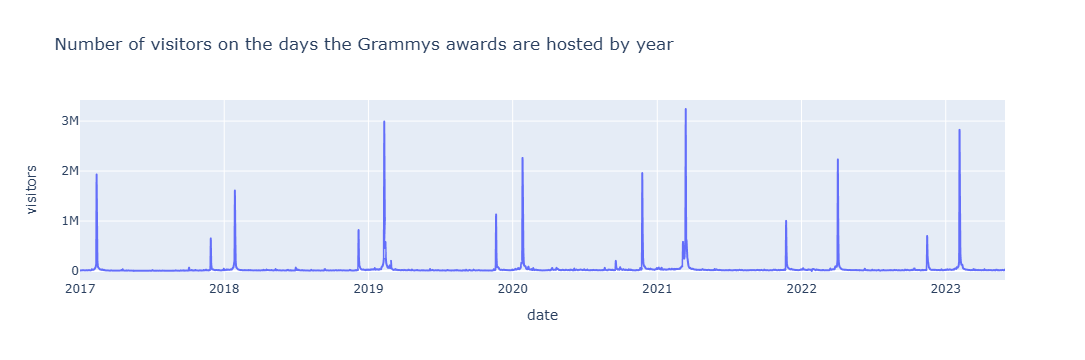

In [116]:
# Plot a line chart of the visitors on the site.
px.line(full_df, x ='date', y = 'visitors', title = 'Number of visitors on the days the Grammys awards are hosted by year')

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Remark:** The smaller spikes, typically around November/December of each year, are when the nominees are announced.</span>

**B.** What can you say about the visitors to the website by looking at the graph?

Each year, there are two peak data events related to the Grammys: one occurs when the Recording Academy announces the nominees, and the other happens during the main showcase event. Viewership typically spikes on Grammy night when the winners are revealed. In 2021, the event saw high viewership. However, in 2022, traffic was lower due to the ceremony being held virtually. In 2023, data peaks were modest, largely due to a boycott by several artists, a disconnect with broader audiences, and controversies surrounding the voting system.

## Task 4

Let's investigate what an "average" day looks like when the awards show is being hosted versus the other 364 days out of the year.

**A.** Use the pandas `.groupby()` to calculate the number of visitors on the site based on the values in the column `awards_night`.

In [117]:
full_df.groupby('awards_night').agg({'visitors': 'mean'})

,visitors
awards_night,
0,32388.28
1,1389590.23


**B.** What can you say about these results? Roughly how many more visitors are on the website for the awards ceremony versus a regular day?

There was a significant spike in viewership during the award night, reaching 1,389,590 viewers—approximately 43 times higher than the average daily viewership of 32,388. 

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Remark:** This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of **one** event per year into one that continues to bring users back on the site year round?</span>

## Task 5

When The Recording Academy decided to split their website into two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. So the `full_df` variable needs to be split separately into two dataframes. The day the domains were switched is on `2022-02-01`.

Create two new dataframes:

1. `combined_site` for all dates before `2022-02-01`
2. `grammys` for all dates after (and including) `2022-02-01`

In [118]:
# Split the data to separate the full_df into two new dataframes.
# One for before the switch of the websites and one for after
combined_site = full_df[full_df['date'] < '2022-02-01']
print(combined_site)
grammys = full_df[full_df['date'] >= '2022-02-01']
print(grammys)

            date  visitors  pageviews  sessions  bounced_sessions  \
0     2017-01-01      9611      21407     10196              6490   
1     2017-01-02     10752      25658     11350              7055   
2     2017-01-03     11425      27062     12215              7569   
3     2017-01-04     13098      29189     13852              8929   
4     2017-01-05     12234      28288     12990              8105   
...          ...       ...        ...       ...               ...   
1852  2022-01-27         2          2         2                 2   
1853  2022-01-28     32986      79160     36571             20268   
1854  2022-01-29     37899      79095     41920             25316   
1855  2022-01-30     39931      81186     43743             26636   
1856  2022-01-31     38221      92863     42291             21747   

      avg_session_duration_secs  awards_week  awards_night  
0                            86            0             0  
1                           100            0     

In [119]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a scary-looking warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [120]:
# print the shape of the combined_site dataframe
combined_site.shape


(1857, 8)

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly, the `combined_site` dataframe should have a total of `1857` rows and `8` columns</span>

# Part II - It's all about KPIs

![](https://media.giphy.com/media/zoKdmndB8QBR2c0gjy/giphy.gif)

There are certain key performance indicators (KPIs) of interest for The Recording Academy. Let's investigate those a little more.

## Task 6

**A.** Create a new list called `frames` that has the `combined_site`, `rec_academy`, and `grammys` dataframes as entries. e.g. If the 3 dataframes were `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

In [121]:
# create the list of dataframes
frames = [combined_site, rec_academy, grammys]


**B.** For each frame in the frames list, create a new column `pages_per_session`. This new column is the average number of pageviews per session on a given day. The higher this number the more "stickiness" your website has with your visitors.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** Divide the `pageviews` by `sessions`</span>

This can be achieved by using the following template:

```python
for frame in frames:
    frame['new_col'] = frame['col_A'] / frame['col_B']
```

In [122]:
# create the `pages_per_session` column for all 3 dataframes.
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] /frame['sessions']
    
print(f"Total viewpages per session for\n{frame['pages_per_session']}")

Total viewpages per session for
1857   2.43
1858   2.10
1859   2.12
1860   2.11
1861   2.08
       ... 
2337   2.22
2338   2.16
2339   2.40
2340   2.20
2341   2.58
Name: pages_per_session, Length: 485, dtype: float64


**C.** Visualize this new metric using a line chart for each site. (You will have 3 separate graphs)

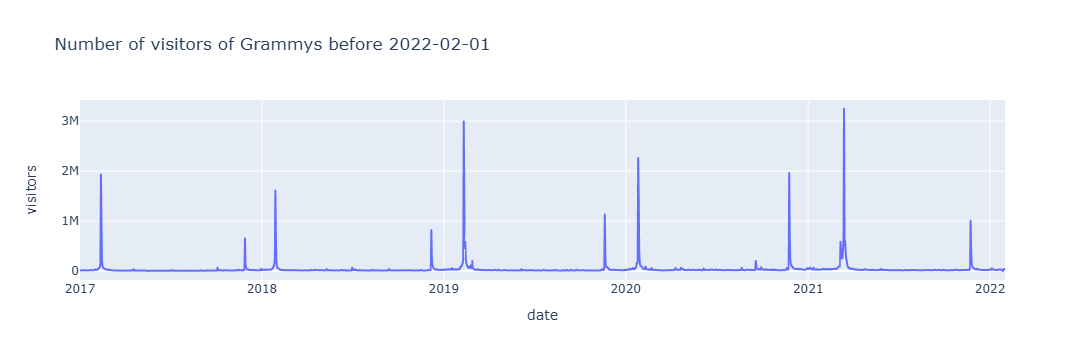

In [124]:
# combined_site graph
px.line(combined_site, x = 'date', y = 'visitors', title ='Number of visitors of Grammys before 2022-02-01')

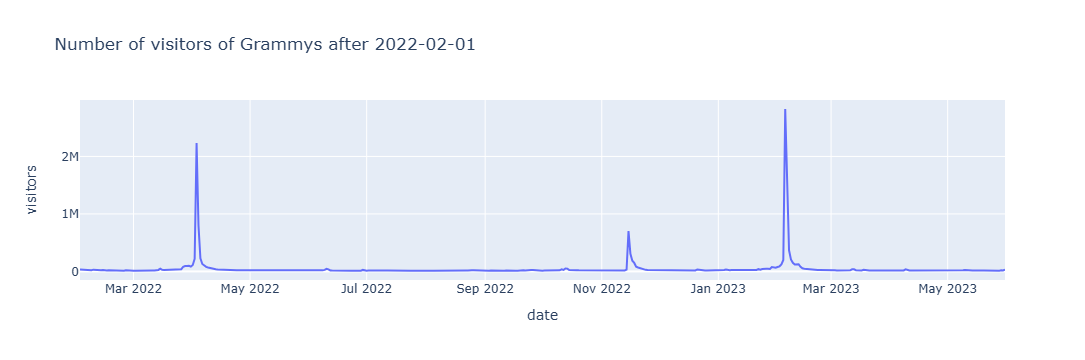

In [125]:
# grammys graph
px.line(grammys, x = 'date', y = 'visitors', title ='Number of visitors of Grammys after 2022-02-01')

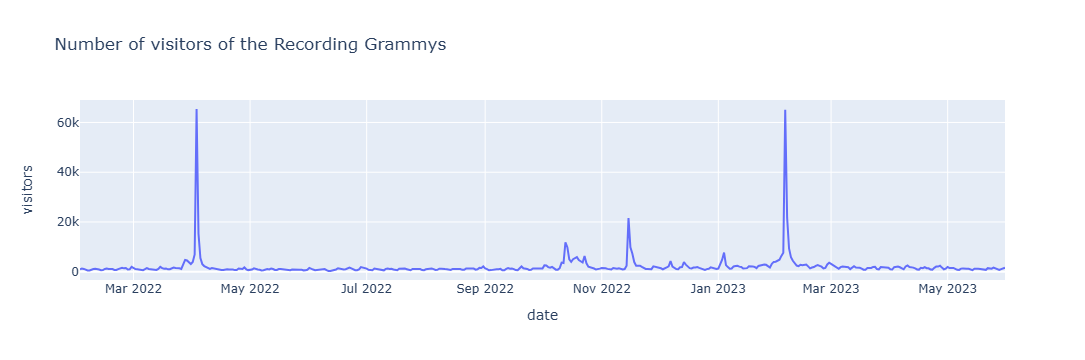

In [126]:
# rec_academy graph
px.line(rec_academy, x = 'date', y = 'visitors', title ='Number of visitors of the Recording Grammys')

**D.** Looking at the 3 charts above, what can you say about the `pages_per_session` when the websites were combined versus after they were split?

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Note:** Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.</span>

Looking at the three charts above, it's clear that the pages per session metric experienced a noticeable change after the websites were split. When the websites were combined, users tended to navigate through more pages per session, indicating broader engagement across the platform. However, after the split, pages per session declined, which could suggest that users were more focused on specific content and less likely to browse beyond their immediate interests. This shift might be due to a more targeted experience or possibly reduced cross-navigation opportunities between sites.



## Task 7

Bounce rate is another important metric for The Recording Academy. Bounce Rate is a measure of the percentage of visitors who come to the site and *never  interact with the website and leave*. In this task, you will define a function that takes in a dataframe as input and outputs the bounce rate.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column and stores in a variable called `sum_bounced`
3. adds up all of the values in the `sessions` column and stores it in a variable called `sum_sessions`
4. returns `100 * sum_bounced / sum_sessions`


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** You will need use the `.sum()` function both in the `sum_bounced` and `sum_sessions` calculations. Don't forget to multiply by `100` so that the answer appears as a percentage instead of a decimal.</span>

In [127]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    # WRITE YOUR CODE BELOW
    # Remember, the input for the function is called `dataframe`
    # So all calculations should reference that variable.

    sum_bounced = dataframe['bounced_sessions'].sum()
    sum_sessions = dataframe['sessions'].sum()
    return 100 * sum_bounced /sum_sessions



**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

A template for getting the function to work will look like code below. Remember that this is NOT the print statement, you will still need to add that part.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** To get the bounce rate use `bounce_rate(frame)` </span>

```python
for frame in frames:
    my_value = my_function(frame)
```

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Tip:** If you want to reduce the number of decimals shown in an f-string, you can add `:0.2f` just before the end of the curly brackets but after your variable. Example: `print(f'my value is: {my_value:0.2f}')`</span>

In [130]:
# Calculate the Bounce Rate for each site. Use the frames list you created in Task 6.
# create the list of dataframes
frames = [combined_site, rec_academy, grammys]

for frame in frames:
    my_value = bounce_rate(frame)
    print(f' Bounce rate for {frame} is {my_value:0.2f} %')

 Bounce rate for             date  visitors  pageviews  sessions  bounced_sessions  \
0     2017-01-01      9611      21407     10196              6490   
1     2017-01-02     10752      25658     11350              7055   
2     2017-01-03     11425      27062     12215              7569   
3     2017-01-04     13098      29189     13852              8929   
4     2017-01-05     12234      28288     12990              8105   
...          ...       ...        ...       ...               ...   
1852  2022-01-27         2          2         2                 2   
1853  2022-01-28     32986      79160     36571             20268   
1854  2022-01-29     37899      79095     41920             25316   
1855  2022-01-30     39931      81186     43743             26636   
1856  2022-01-31     38221      92863     42291             21747   

      avg_session_duration_secs  awards_week  awards_night  pages_per_session  
0                            86            0             0               2

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly, the `combined_site` and `grammys` site will each have bounce rates in the low 40s. The `rec_academy` will have a bounce rate in the low 30s</span>

**C.** Another useful metric is how long on average visitors are staying on the website.

Calculate the `mean` of the `avg_session_duration_secs` for each of the sites.
Print each one using an f-string.

In [131]:
# Calculate the average of the avg_session_duration_secs. Use the frames list you created in Task 6.

# create the list of dataframes
frames = [combined_site, rec_academy, grammys]

total_duration = 0
count = 0
for frame in frames:
    total_duration += frame['avg_session_duration_secs'].sum()
    count = frame['avg_session_duration_secs'].count()
    mean_duration = total_duration / count
    print(f'average visitors are staying on the website {frame} is {mean_duration:.02f} seconds')

average visitors are staying on the website             date  visitors  pageviews  sessions  bounced_sessions  \
0     2017-01-01      9611      21407     10196              6490   
1     2017-01-02     10752      25658     11350              7055   
2     2017-01-03     11425      27062     12215              7569   
3     2017-01-04     13098      29189     13852              8929   
4     2017-01-05     12234      28288     12990              8105   
...          ...       ...        ...       ...               ...   
1852  2022-01-27         2          2         2                 2   
1853  2022-01-28     32986      79160     36571             20268   
1854  2022-01-29     37899      79095     41920             25316   
1855  2022-01-30     39931      81186     43743             26636   
1856  2022-01-31     38221      92863     42291             21747   

      avg_session_duration_secs  awards_week  awards_night  pages_per_session  
0                            86            0   

**D.** What can you say about these two metrics as it relates to each of the websites?

Before 02/01/2022, the combined website had a bounce rate of 102 seconds or 1.7 minutes. After plitting the two websites after 02/01/2022, the bounce rate increased with 522 seconds or 8.7 minutes for The Recording Grammys website and 605 seconds or 10 minutes for Grammys website. If bounce rate increased on just one site, that site might be less relevant or poorly optimized for its audience. Here increased on both, the split may have disrupted user flow or content quality in general so it should improve CTAs, internal links, and content relevance. Compare pre-split and post-split bounce rates per page type or content section and check traffic sources — are users coming from the right channels and using session recordings or heatmaps to see where users are dropping off can be next investigation. Watch mouse movements, clicks, scrolls, and pauses may help see exactly how users interact with each page and create a visual summaries of user behavior across many sessions.


# Part III - Demographics

![](https://media.giphy.com/media/GrUhLU9q3nyRG/giphy.gif)

Age demographics are a way to see which audience(s) your content is resonating with the most. This can inform marketing campaigns, ads, and much more.

Let's investigate the demographics for the two websites. This will require reading in two new files and joining them in python.

## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demographics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [132]:
# read in the files
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')

In [133]:
# preview the age_grammys file. the age_tra will look very similar.
age_grammys.head()


,age_group,pct_visitors
0,18-24,27.37
1,25-34,24.13
2,35-44,18.72
3,45-54,13.57
4,55-64,9.82


In [134]:
age_tra.head()

,age_group,pct_visitors
0,18-24,27.12
1,25-34,26.16
2,35-44,19.55
3,45-54,13.82
4,55-64,8.24


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [135]:
# create the website column
age_grammys['website'] = 'Grammys'
age_tra['website'] = 'Recording Academy'

**C.** use the `pd.concat()` method to join these two datasets together. Store the result into a new variable called `age_df`

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** Remember that you need to put your dataframe variables inside of a **list** first then pass that as your input of `pd.concat()`</span>

In [136]:
# use pd.concat to join the two datasets
age_df = pd.concat([age_grammys, age_tra], ignore_index= True)
print(age_df)


   age_group  pct_visitors            website
0      18-24         27.37            Grammys
1      25-34         24.13            Grammys
2      35-44         18.72            Grammys
3      45-54         13.57            Grammys
4      55-64          9.82            Grammys
5        65+          6.39            Grammys
6      18-24         27.12  Recording Academy
7      25-34         26.16  Recording Academy
8      35-44         19.55  Recording Academy
9      45-54         13.82  Recording Academy
10     55-64          8.24  Recording Academy
11       65+          5.12  Recording Academy


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly your new dataframe will have `12` rows and `3` columns.</span>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** You will need to use the `barmode='group'` option in `px.bar()`. See the code snippet below to guide you.</span>

```python
# template for visualization
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

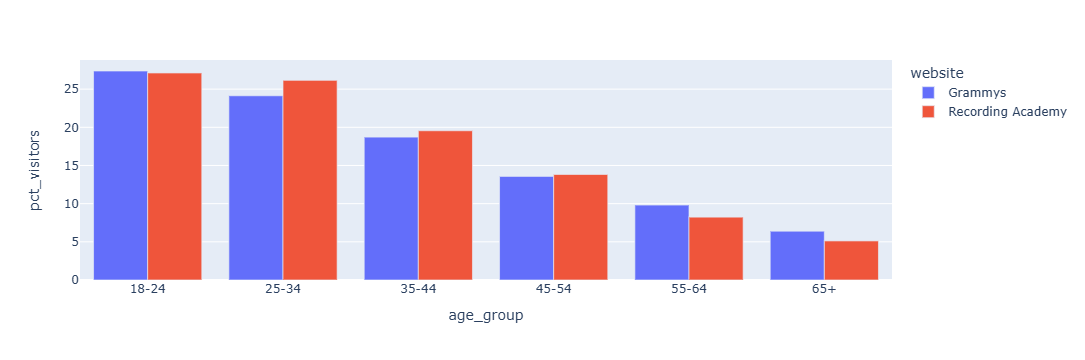

In [137]:
# Create bar chart
px.bar(age_df, x = 'age_group', y = 'pct_visitors', color = 'website', barmode = 'group')


**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

There were a lot viewers age from 18-34 for both websites, and there are many more professionals have visited the Recording Academy website tham Grammys, age was from 25 to 54 years old. The Grammys website have more viewers from senior from 55 to over 65. 

Age 18–34: High traffic on both websites, this group likely includes fans, casual viewers, and younger professionals.Indicates that they are strong general interest in both the Grammys and the Recording Academy brands and are Valuable audiences for social media campaigns and streaming content.

Ages 25–54: Heavily skewed toward the Recording Academy
Suggests the Recording Academy site attracts more industry professionals (artists, producers, media, etc.) for 
voting info, submission guidelines, industry news and updates, they are great target group for membership outreach, educational content, or professional events.

Ages 55+: More common on the Grammys website. The Grammys site has stronger traction with senior audiences (55–65+) include longtime fans, retired professionals, or those interested in the history and prestige of the awards.

Tailor content and UI based on age demographics:

1. Grammys site: user-friendly design for seniors, more visual storytelling

2. Recording Academy: tools, articles, resources for professionals

3. Consider age-targeted advertising or email segmentation based on these trends.

4. Analyze bounce rate and engagement within these age segments to optimize each site further.

# Part IV - Recommendation
![](https://media.giphy.com/media/0Av9l0VIc01y1isrDw/giphy.gif)

## Task 9

Using the work you did in this project, would you recommend that the websites stay separate? Please give a 2-3 paragraph answer using details from the analysis work above explaining why or why not they should stay separate.

Based on the analysis, while splitting the original Grammys website into two separate entities — one for the Grammys and one for the Recording Academy — helped to better segment content and cater to different audiences, it also introduced new challenges. Notably, bounce rates increased post-split, indicating users may be encountering friction or confusion when navigating the new structure. This suggests that while segmentation may make strategic sense from a branding or organizational standpoint, the execution may have unintentionally disrupted the user experience.

However, despite the higher bounce rates, the demographic distribution reveals meaningful audience differentiation. The Recording Academy website is attracting more professionals aged 25–54, which aligns with its mission to serve industry insiders. Meanwhile, the Grammys website maintains a broad appeal, especially among younger viewers aged 18–34 and a notable number of older fans aged 55+, showing that it continues to serve as the primary hub for public-facing content and fan engagement. This implies that the split has successfully aligned audiences with the appropriate content.

Therefore, while the increased bounce rate is a concern, it doesn't necessarily mean the split should be reversed. Instead, it highlights the need for better user guidance, cross-linking between sites, and clearer branding or navigation paths to help users find what they’re looking for without prematurely leaving. With optimization, the dual-site model could effectively serve both the public and professional communities more efficiently than a single, all-encompassing site.

# LevelUp
![](https://media.giphy.com/media/6fUIhrlrHCzEHvY8oF/giphy.gif)

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your task is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.

![](figs/TheAMAs.png)

Let's review some of the content from above.

The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [138]:
# Load in the data
desktop_users = pd.read_csv('datasets/desktop_users.csv')
mobile_users = pd.read_csv('datasets/mobile_users.csv')


In [139]:
# preview the desktop_users file
desktop_users.head()

,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [140]:
# preview mobile_users file
mobile_users.head()

,date,segment,visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


As you can imagine, you will be joining the two datasets together! But before you do that, you will modify the column names so that it's easier to use.

**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [141]:
# change name of the visitors column to indicate which category it comes from
desktop_users = desktop_users.rename(columns = {'visitors': 'desktop_visitors'})
desktop_users.head()


,date,segment,desktop_visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [142]:
mobile_users = mobile_users.rename(columns = {'visitors': 'mobile_visitors'})
mobile_users.head()

,date,segment,mobile_visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


In [143]:
# drop the segment column from each dataframe
mobile_users.drop('segment', axis = 1, inplace = True)
desktop_users.drop('segment', axis = 1, inplace = True)


**C.** Join the two dataframes together in a new variable called `segment_df`.

In [144]:
# join the two dataframes and preview the dataframe
segment_df = pd.merge(mobile_users, desktop_users)
segment_df.head()

,date,mobile_visitors,desktop_visitors
0,2022-02-01,23494,10195
1,2022-02-02,20234,10560
2,2022-02-03,22816,9935
3,2022-02-04,18592,8501
4,2022-02-05,13298,5424


**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [145]:
# create total_visitors column
segment_df['total_visitors'] = desktop_users['desktop_visitors'] + mobile_users['mobile_visitors']
segment_df.head()

,date,mobile_visitors,desktop_visitors,total_visitors
0,2022-02-01,23494,10195,33689
1,2022-02-02,20234,10560,30794
2,2022-02-03,22816,9935,32751
3,2022-02-04,18592,8501,27093
4,2022-02-05,13298,5424,18722


To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.

In [146]:
# filter and calculate the percentage share
segment_df1 = segment_df[segment_df['date'] >= '2023-04-01']

perc_desktop_visi = (segment_df1['desktop_visitors'].sum() / segment_df1['total_visitors'].sum())* 100
perc_desktop_visi 

perc_mobile_visi = (segment_df1['mobile_visitors'].sum() / segment_df1['total_visitors'].sum())* 100
perc_mobile_visi
print(f'Percentage share of desktop visitors: {perc_desktop_visi:.02f} %')
print(f'Percentage share of mobile visitors: {perc_mobile_visi:.02f} %')
segment_df1['total_visitors'].sum()

Percentage share of desktop visitors: 31.84 %
Percentage share of mobile visitors: 68.16 %


1428482

**What is the percentage share of desktop and mobile visitors on the Grammys website in the timeframe in question?**

**What is the total number of visitors on the site during this timeframe?**

Percentage share of desktop visitors on the Grammys website during the AMA awards is 31.84 %. 
Percentage share of mobile visitors on the Grammys website during the AMA awards is 68.16 %. 
Total visitors on the Grammys website during the AMA awards is 1,428,482 viewers.

**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?

Visitors on the AMA website for the months of April, May, and June of 2023 are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%. 
After plitting the two Grammys websites on 02/01/2022, the bounce rate increased at 522 seconds or 8.7 minutes for The Recording Grammys website and 605 seconds or 10 minutes for Grammys website. There was a significant spike in viewership during the Grammys award night, reaching 1,389,590 viewers—approximately 43 times higher than the average daily viewership of 32,388. During AMA awards night, total visitors on the Grammys website during the AMA awards is 1,428,482 viewers, which higher than the Grammys award night. Percentage share of desktop visitors on the Grammys website during the AMA awards is 31.84 %, and percentage share of mobile visitors on the Grammys website during the AMA awards is 68.16 %.

Performance Comparison: Grammys vs. AMA Website
The Grammys website is actually outperforming the AMA website in several key KPIs post-split:

Average Time on Site:

Grammys: 605 seconds (10 minutes)

Recording Academy: 522 seconds (8.7 minutes)

AMA: 353 seconds (5 minutes and 53 seconds)

📈 Both Grammys-related sites exceed the AMA in user engagement duration.



Award Night Traffic:

Grammys Night: 1,389,590 viewers (43× daily average)

AMA Night (on the Grammys site): 1,428,482 viewers

📊 This suggests strong brand pull and perhaps user confusion or redirection driving Grammys traffic even during AMA events — a signal of brand dominance or misrouting.

Device Share (AMA Night, on Grammys site):

Mobile: 68.16%

Desktop: 31.84%

📱 Indicates a clear mobile-first audience, which must be prioritized in design and content strategy.

✅ What the Grammys Website Is Doing Well
High Engagement: Visitors are staying much longer (up to 10 minutes) compared to the AMA site. This shows strong interest in content, videos, articles, or archives.

Strong Event Peaks: The Grammys site handles surges in traffic well and sees massive spikes during award nights, reinforcing its place as a go-to destination for music fans.

Mobile Optimization (likely): With a 68% mobile share during AMA night, the site seems to be accommodating mobile traffic well.

⚠️ Key KPIs to Improve
Bounce Rate: Even with long engagement, the increased bounce rate post-split is concerning. This could mean that:

Users are landing on the wrong site (Grammys vs. Recording Academy).

There’s confusion or lack of cross-navigation.

First-touch content may not be meeting expectations.

Page Flow Optimization: The time-on-site metric is high, but we don’t know the pages per session. If users are lingering on one page, that might be due to slow load, video content, or friction — not always a good thing.

Clarify Brand Split: The fact that AMA viewers landed on the Grammys site in such high numbers could indicate:

Misleading links elsewhere

Confusion over where to stream or find info

Opportunity to better distinguish the two brands


🧾 Recommendation Summary
The Grammys website is outperforming the AMA in session duration and likely in engagement quality. However, the increased bounce rate and potential brand confusion post-split signal a need for better user flow, content targeting, and cross-site linking. Improving these KPIs could solidify the Grammys' dominance as a digital music destination across both professional and fan-facing platforms.